# Импортируем библиотеки

In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# Импортируем датасет - Global Terror

In [4]:
data = pd.read_csv("GlobalTerror.csv")
data.fillna(0).head(4)

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,0,0,0,58,Dominican Republic,2,...,0,0,0,0,PGIS,0,0,0,0,0
1,197000000002,1970,0,0,0,0,0,130,Mexico,1,...,0,0,0,0,PGIS,0,1,1,1,0
2,197001000001,1970,1,0,0,0,0,160,Philippines,5,...,0,0,0,0,PGIS,-9,-9,1,1,0
3,197001000002,1970,1,0,0,0,0,78,Greece,8,...,0,0,0,0,PGIS,-9,-9,1,1,0


# Выбираем данные
*Некоторые данные слишком малы и не значимы*
<font size = "4"><font color = "grey"><p>
Extended - if terract had been continuing more than 24 hours
</p></font></font>

In [5]:
parameters = [  "iyear", "imonth", "iday", "extended",
                "country", "region","suicide",
                "attacktype1", "targtype1","success",
                "targsubtype1", "natlty1", "nperps",
                "weaptype1", "weapsubtype1"
                ]
new_data = data[parameters].fillna(0)
new_data.head(-5)

,iyear,imonth,iday,extended,country,region,suicide,attacktype1,targtype1,success,targsubtype1,natlty1,nperps,weaptype1,weapsubtype1
0,1970,7,2,0,58,2,0,1,14,1,68.0,58.0,0.0,13,0.0
1,1970,0,0,0,130,1,0,6,7,1,45.0,21.0,7.0,13,0.0
2,1970,1,0,0,160,5,0,1,10,1,54.0,217.0,0.0,13,0.0
3,1970,1,0,0,78,8,0,3,7,1,46.0,217.0,0.0,6,16.0
4,1970,1,0,0,101,4,0,7,7,1,46.0,217.0,0.0,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181681,2017,12,31,0,160,5,0,3,3,1,23.0,160.0,-99.0,6,16.0
181682,2017,12,31,0,98,8,0,7,14,1,65.0,98.0,-99.0,8,18.0
181683,2017,12,31,0,4,6,0,2,17,1,94.0,4.0,-99.0,5,5.0
181684,2017,12,31,0,92,6,0,6,2,1,15.0,92.0,-99.0,5,2.0


# Визуализация

<font size = "6"><font color = "Grey">Визуализация (iyear, nperps)</font></font>L

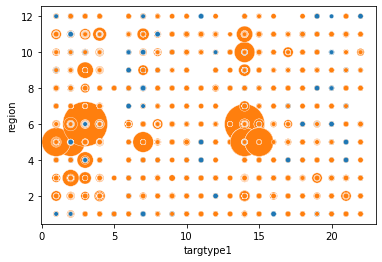

In [6]:
df = new_data.sample(frac = 1)
fig, ax = plt.subplots()
sb.scatterplot(
    data=df, 
    x="targtype1", 
    y="region", 
    hue="success", 
    size="nperps",
    sizes = (20, 2000)
);
ax.legend().set_visible(False)

*Регион, количество террористов и тип атакуемого объекта сильно коллерируют*

<font size = "6"><font color = "Grey">Визуализация (targtype1, natlty1)</font></font>

No handles with labels found to put in legend.


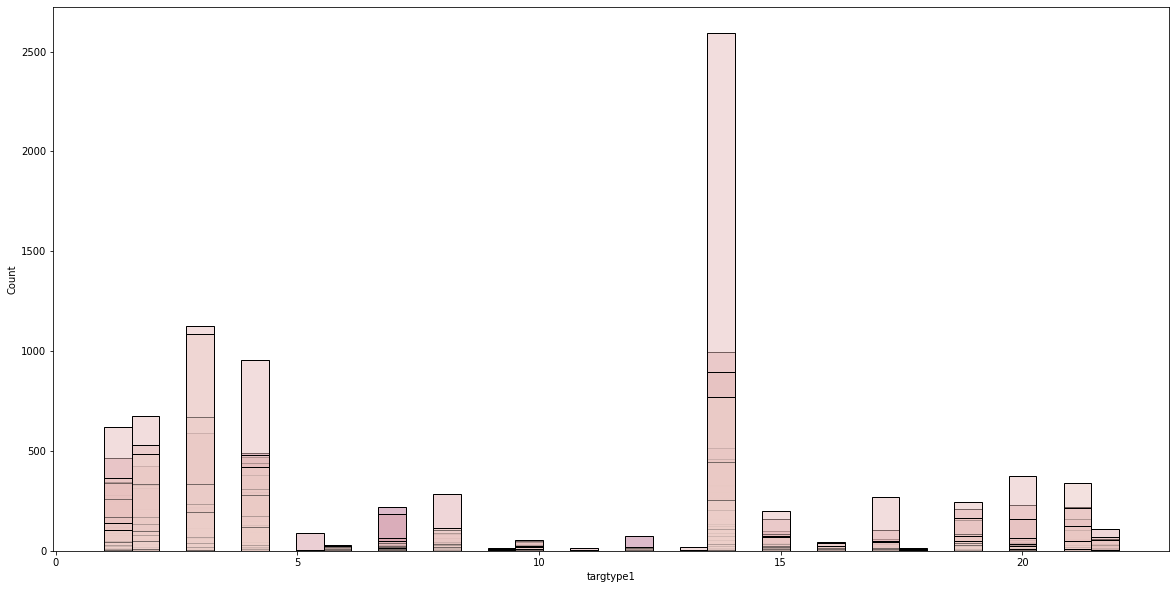

In [16]:
df = data.sample(frac = 0.3)

fig, ax = plt.subplots()
sb.histplot(
    data = df,
    x = "targtype1",
    hue = "natlty1",
);
plt.rcParams['figure.figsize']=(10,10)
ax.legend().set_visible(False)

*Национальность атакованной цели и тип атакуемого объекта*

<font size = "6"><font color = "grey">Визуализация (targtype1, weaptype1)</font></font>

<AxesSubplot:xlabel='targtype1', ylabel='Count'>

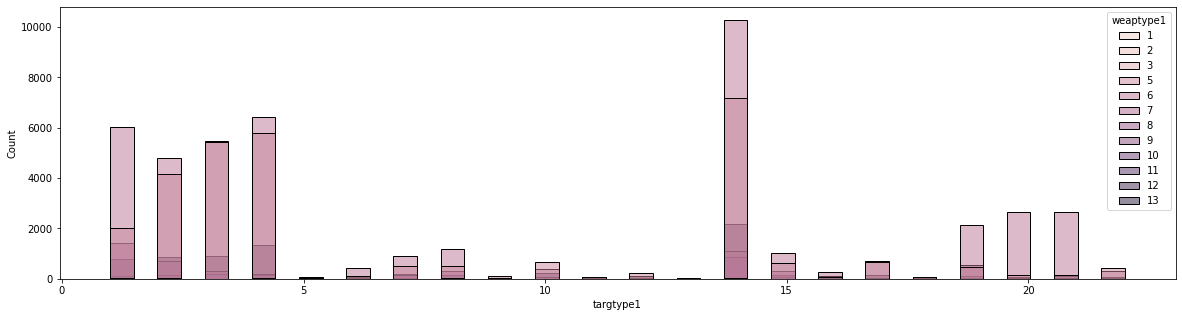

In [11]:

df = new_data.sample(frac = 0.5)
fig, ax = plt.subplots()
sb.histplot(
    data=df, 
    x="targtype1",
    hue="weaptype1"
)


*Тип оружия и тип атакуемого объекта сильно коллерируют*

# Тренировка модели (DecisionTreeClassifier)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

X = new_data.drop("targtype1", axis = 1)
#X = new_data.loc[:, ["attacktype1", "nperps","natlty1", "weaptype1"]]
y = new_data["targtype1"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)
tree = DecisionTreeClassifier()

tree = tree.fit(X_train, y_train)
y_kmeans = tree.predict(X_test)
tree.n_classes_
print(f"Accuracy: {metrics.accuracy_score(y_kmeans, y_test)}")
tree.score(X_test, y_test)

Accuracy: 0.9834888136712623


0.9834888136712623

*Количество атакуемых объектов = 22, точность предсказания типа атакуемого объекта = 98%*